In [4]:
# Import base libraries
import pandas as pd
import numpy as np
from scipy.io import arff

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load data
data3 = arff.loadarff('data/3year.arff')
df3 = pd.DataFrame(data3[0])

In [18]:
df3['class'] = df3['class'].astype('int64')

In [25]:
df3['class'].value_counts(normalize=True)

0    0.952871
1    0.047129
Name: class, dtype: float64

In [19]:
# Assign target and predictor
y = df3['class']
X = df3.drop('class', axis=1)

In [20]:
# Sepearate data into train and test splist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (8402, 64)
y_train shape =  (8402,)
X_test shape =  (2101, 64)
y_test shape =  (2101,)


In [21]:
# Scale/Normalize the predictor variables

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [41]:
XGBClassifier().get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [26]:
#Baseline XGBoost

xgb = XGBClassifier(eval_metric='logloss', random_state=42) #'logloss' is default, but specified to stop warning
xgb.fit(X_train, y_train)

print('Data3:\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3:

Training Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      8014
           1       0.98      0.42      0.59       388

    accuracy                           0.97      8402
   macro avg       0.98      0.71      0.79      8402
weighted avg       0.97      0.97      0.97      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1994
           1       0.93      0.36      0.52       107

    accuracy                           0.97      2101
   macro avg       0.95      0.68      0.75      2101
weighted avg       0.97      0.97      0.96      2101



In [34]:
val_counts = df3['class'].value_counts()
ratio_imbalance = val_counts[0]/val_counts[1]
sqrt_ratio_imbalance = np.sqrt(val_counts[0]/val_counts[1])
print('imbalance ratio:', ratio_imbalance)
print('sqrt of imbalance ratio:', sqrt_ratio_imbalance)

imbalance ratio: 20.21818181818182
sqrt of imbalance ratio: 4.496463256625347


In [38]:
#Treat Imbalance, scale_pos_weight = imbalance ratio

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=20, random_state=42)
xgb.fit(X_train, y_train)

print('Data3, Imbalance addressed, scale_pos_weight = imbalance ratio:\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3, Imbalance addressed, scale_pos_weight = imbalance ratio:

Training Data:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96      8014
           1       0.38      0.96      0.54       388

    accuracy                           0.93      8402
   macro avg       0.69      0.94      0.75      8402
weighted avg       0.97      0.93      0.94      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      1994
           1       0.34      0.75      0.47       107

    accuracy                           0.91      2101
   macro avg       0.66      0.83      0.71      2101
weighted avg       0.95      0.91      0.93      2101



In [112]:
#Treat Imbalance, scale_pos_weight = sqrt of imbalance ratio

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=4.5, random_state=42)
xgb.fit(X_train, y_train)

print('Data3, Imbalance addressed, scale_pos_weight = 4.5 (sqrt of imbalance ratio):\n')
print('Training Data:\n', classification_report(y_train, xgb.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb.predict(X_test)))

Data3, Imbalance addressed, scale_pos_weight = 4.5 (sqrt of imbalance ratio):

Training Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      8014
           1       0.78      0.69      0.73       388

    accuracy                           0.98      8402
   macro avg       0.88      0.84      0.86      8402
weighted avg       0.98      0.98      0.98      8402

Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1994
           1       0.69      0.53      0.60       107

    accuracy                           0.96      2101
   macro avg       0.83      0.76      0.79      2101
weighted avg       0.96      0.96      0.96      2101



In [47]:
# Tuning XGBClassifier with GridSearchCV

start=datetime.now()

xgb_param_grid = {
    'scale_pos_weight': [1, 2, 3, 4.5, 6, 8, 10, 15, 20, 25, 99],  # default: 1
}

xgb = XGBClassifier(random_state=42, eval_metric='auc')
xgb_gs = GridSearchCV(xgb, xgb_param_grid, cv=3)
xgb_gs.fit(X_train, y_train)

print('Data 3, scale_pos_weight Tuning Results:\n')
print("Best Parameter Combination:", xgb_gs.best_params_)
print('Training Data:\n', classification_report(y_train, xgb_gs.predict(X_train)))
print('Testing Data:\n', classification_report(y_test, xgb_gs.predict(X_test)))

end=datetime.now()

print('Process time:', end-start)

KeyboardInterrupt: 

In [132]:
baseParams = "learning_rate=0.3, min_child_weight=5, n_estimators=10, subsample=1"
clf = XGBClassifier(learning_rate=0.3, min_child_weight=5, n_estimators=10, subsample=1)
d=3
scan_param = 'scale_pos_weight'
#clf.set_params(scan_param)
clf.max_depth = [0, 3, 5]

In [111]:
a = clf.max_depth
a[2]

5

In [114]:
clf.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=[0, 3, 5],
              min_child_weight=5, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [138]:
xgb_params = {'reg_lambda': 0.8}

In [139]:
xgb_params['max_depth']=7

In [141]:
xgb_params[scan_param]=25

In [144]:
clf2 = XGBClassifier(**xgb_params)

In [145]:
clf2.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.8, scale_pos_weight=25, seed=None,
              silent=None, subsample=1, verbosity=1)>

In [153]:
def scan_xgb(dataNumber, X_tr, y_tr, X_te, y_te, xgbParams, scanParam, scanList):

    fig, axes = plt.subplots(3, 2, figsize=(20, 20))
    #plt.tight_layout(pad=5)
    
    for ax, s in zip(axes.flat, scanList):
        
        xgbParams[scanParam]=s
        
        clf = XGBClassifier(**xgbParams)
          
        clf.fit(X_tr, y_tr)
    
        y_train_pred = clf.predict(X_tr)   
        y_train_prob = clf.predict_proba(X_tr) #Probability estimates for each class
        fpr_train, tpr_train, thresholds_train = roc_curve(y_tr, y_train_prob[:,1])
        auc_train = round(auc(fpr_train, tpr_train),3)
        f1_train = round(f1_score(y_tr, y_train_pred),3)
        recall_train = round(recall_score(y_tr, y_train_pred),3)
        precision_train = round(precision_score(y_tr, y_train_pred),3)
        accuracy_train = round(accuracy_score(y_tr, y_train_pred),3)
        ax.plot(fpr_train, tpr_train, lw=2, label=f'Train: acc={accuracy_train}, prec={precision_train}, rec={recall_train}, f1={f1_train}, AUC={auc_train}')
    
        y_test_pred = clf.predict(X_te)
        y_test_prob = clf.predict_proba(X_te) #Probability estimates for each class
        fpr_test, tpr_test, thresholds_test = roc_curve(y_te, y_test_prob[:,1])
        auc_test = round(auc(fpr_test, tpr_test),3)
        f1_test = round(f1_score(y_te, y_test_pred),3)
        recall_test = round(recall_score(y_te, y_test_pred),3)
        precision_test = round(precision_score(y_te, y_test_pred),3)
        accuracy_test = round(accuracy_score(y_te, y_test_pred),3)
        ax.plot(fpr_test, tpr_test, lw=2, label=f'Test: acc={accuracy_test}, prec={precision_test}, rec={recall_test}, f1={f1_test}, AUC={auc_test}')  
    
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_yticks([i/20.0 for i in range(21)])
        ax.set_xticks([i/20.0 for i in range(21)])
        ax.set_xlabel('False Positive Rate', fontsize=14)
        ax.set_ylabel('True Positive Rate', fontsize=14)
        ax.set_title(f'ROC Curve for Data {dataNumber}, {scanParam}={s}', fontsize=14)
        ax.legend(loc='auto', fontsize=13)
    
    plt.savefig(f'figures/ROC_Curve_d{dataNumber}_{scanParam}.png')
    

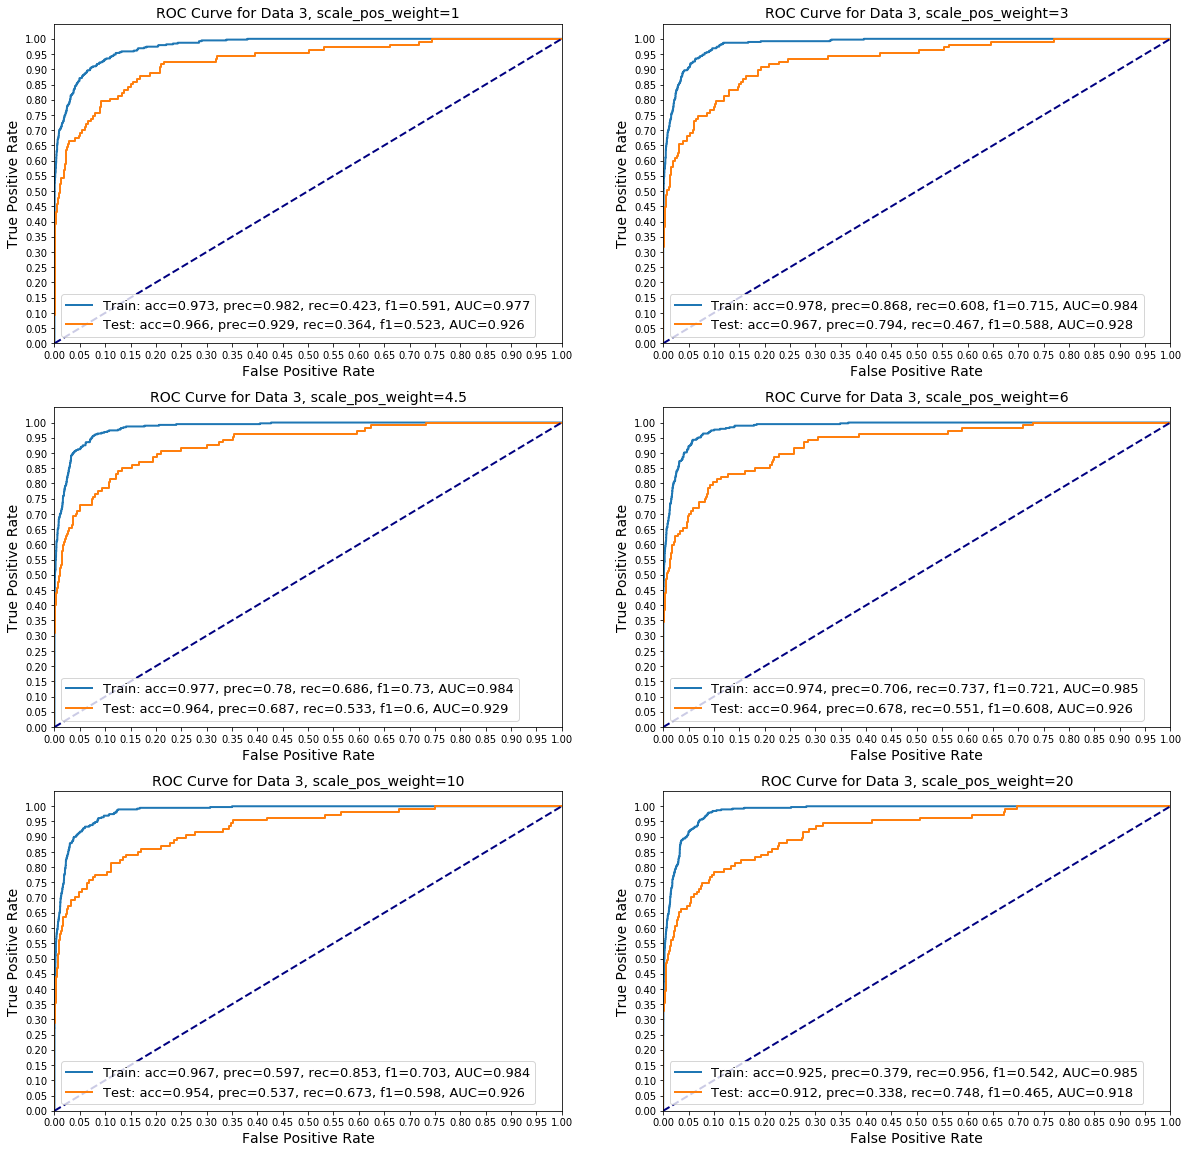

In [155]:
xgbParams = {
    'eval_metric': 'logloss', 
    'random_state': 42
}

scanParam = 'scale_pos_weight'

scanList = [1, 3, 4.5, 6, 10, 20]

scan_xgb(3, X_train, y_train, X_test, y_test, xgbParams, scanParam, scanList)